In [4]:
import logging
import sys
from pathlib import Path
import logging.config

import gdown
import zipfile
import tempfile
import warnings
def download_data_gdown(url, dest_path):
    """Download data from url, extract it and save it to dest_path"""
    # logger.info(f"Downloading data from {url} to {dest_path}")
    with tempfile.TemporaryDirectory() as tmp_dir:
        tmp_path = Path(tmp_dir)
        zip_path = tmp_path / "data.zip"
        gdown.download(url, str(zip_path), quiet=False)
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall(dest_path)

In [5]:
WEIDATA_URL = "https://drive.google.com/uc?id=1W_g3NKVirJCYms0JX7fEjXd4dhPc5w30"
WEI_PATH = Path("Data", "wei")
download_data_gdown(
        WEIDATA_URL,
        WEI_PATH,
    )

Downloading...
From: https://drive.google.com/uc?id=1W_g3NKVirJCYms0JX7fEjXd4dhPc5w30
To: C:\Users\hoang\AppData\Local\Temp\tmpxrjao4ml\data.zip
100%|██████████| 486k/486k [00:00<00:00, 944kB/s]


In [8]:
from pathlib import Path

import joblib
from sklearn.model_selection import train_test_split


class WeisDataset:
    def __init__(self, dataset_folder, test_size=0.2):
        self.dataset_folder = dataset_folder
        self.sequence_path = list(Path(dataset_folder).glob("*.pkl"))
        # filename
        labels = set([p.stem.split("_")[1] for p in self.sequence_path])
        self.label2idx = {label: idx for idx, label in enumerate(labels)}
        self.idx2label = {idx: label for idx, label in enumerate(labels)}
        self.train_test_split(test_size=test_size)

    def get_label_name_from_filepath(self, file_path: Path):
        return file_path.stem.split("_")[1]

    @classmethod
    def from_folder(cls, dataset_folder, test_size=0.2):
        return cls(dataset_folder, test_size=test_size)

    def __len__(self):
        return len(self.sequence_path)

    def __getitem__(self, idx):
        return self.get_sequence(idx), self.get_label(idx)

    def get_label(self, idx):
        return self.get_label_name_from_filepath(self.sequence_path[idx])

    def get_sequence(self, idx):
        mask_sequence_flatten = joblib.load(self.sequence_path[idx])
        return mask_sequence_flatten.astype("float64")

    def train_test_split(self, test_size=0.2):
        labels = [self.get_label(idx) for idx in range(len(self))]
        self.train_idx, self.test_idx = train_test_split(
            range(len(self)), test_size=test_size, stratify=labels
        )

In [11]:
weis_dataset = WeisDataset.from_folder("Data/wei", test_size=0.5)
X_train = [weis_dataset.get_sequence(idx) for idx in weis_dataset.train_idx]
X_test = [weis_dataset.get_sequence(idx) for idx in weis_dataset.test_idx]

In [14]:
len(X_train), X_train[0].shape, X_train[0]

(40,
 (82, 2450),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

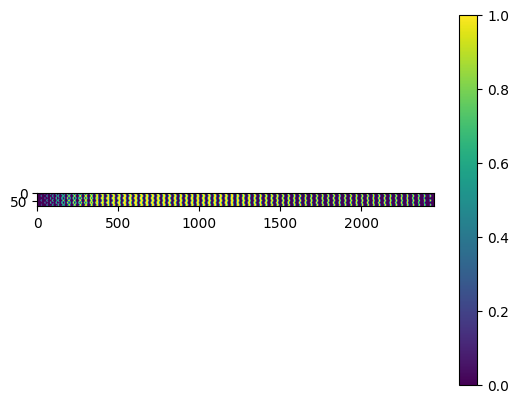

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='viridis')
plt.colorbar()
plt.show()

In [2]:
import joblib
import numpy as np
import os
import matplotlib.pylab as pl
import ot
import ot.plot
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sys

In [17]:
directory = "Data/wei"
new_directory = "Data/wei/Pad"
max_len = 146
num_pixel = 2450

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        serie = joblib.load(f)
        len = serie.shape[0]
        new_serie = np.empty((max_len, num_pixel), dtype='uint8')

        for i in range(len):
            for j in range(math.floor(i*max_len/len), min(max_len, math.floor((i+1)*max_len/len))):
                new_serie[j] = serie[i]
        
        new_f = os.path.join(new_directory, filename)
        joblib.dump(new_serie, new_f)
                

In [3]:
directory = "Data/MultiDimensions/wei_dataset_feature/binary"

X = []
y = np.empty(80, dtype='<U9')

index = 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        X.append(joblib.load(f))
        y[index] = filename.split('_')[1]
        index = index + 1

In [4]:
X[0].shape

(84, 2450)

In [6]:
X[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

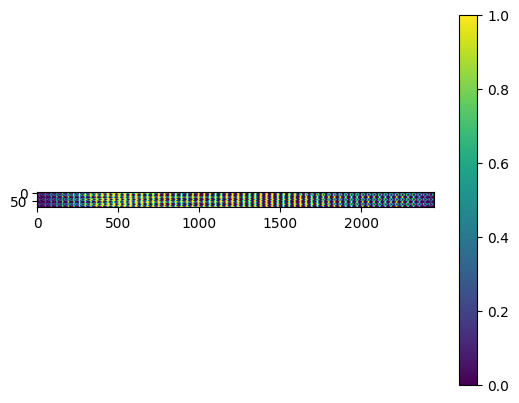

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[1], cmap='viridis')
plt.colorbar()
plt.show()

In [9]:
import joblib
X_train = joblib.load("./Data/MultiDimensions/Weizmanns/X_train.pkl")


In [10]:
X_train[0].shape

(84, 2450)

In [11]:
X_train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<Axes: >

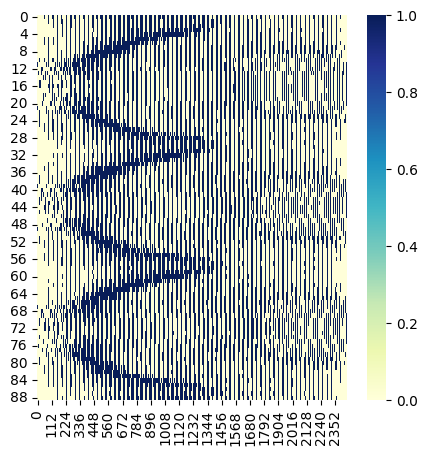

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(X_train[1], cmap="YlGnBu", annot=None)